In [1]:
import numpy as np, random, operator, pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Creating the list of houses (nodes are taken from simulator)
HouseList = [(3,1.5), (4.25,1), (-3, 1.8), (-3, -1), (-6, -2.8), (-6, -1.9), (-6, 1.8), (-4.1, 1.8), (0,0), (0,1), (1, -2), (-3, 1), (-1, 1.8), (-6, 1.75), (-1, -2.5)]


In [3]:
# Randomly finding the number of houses from where waste is to be collected
Number_of_houses = len(HouseList)
Number_of_nodes = np.random.randint(0, Number_of_houses)
Number_of_nodes

9

In [4]:
# Set of nodes of houses
pop1 = set(np.arange(Number_of_houses))
pop1

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}

In [5]:
# Creating a list of nodes of those houses from where the waste is to be collected
lst1 = list(random.sample(pop1, Number_of_nodes))
lst1

[8, 4, 2, 1, 14, 7, 3, 11, 5]

In [6]:
def create_new_member(lst):
    '''
    creating new member of the population
    '''
    route=list(random.sample(lst,Number_of_nodes))
            
    return route

In [7]:
def create_starting_population(size,Number_of_houses):
    '''Method create starting population 
    size= No. of the house
    Number_of_house= Total No. of the houses
    '''
    population = []
    
    for i in range(0,size):
        population.append(create_new_member(lst1))
        
    return population

In [8]:
def pick_mate(N):
    '''mates are randomaly picked 
    N= no. of House '''
    i=random.randint(0,N)    
    return i

In [9]:
def distance(i,j):
    '''
    Method calculate distance between two cities if coordinates are passed
    i=(x,y) coordinates of first house
    j=(x,y) coordinates of second house
    '''
    #returning distance of house i and j 
    return np.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2)

In [10]:
def score_population(population, HouseList):  
    '''
    Score of the whole population is calculated here
    population= 2 dimensional array conating all the routes
    Houselist= List of the Houses 
    '''
    scores = []
  
    for i in population:
        scores.append(fitness(i, HouseList))
    return scores

In [11]:
def fitness(route,HouseList):
    '''Individual fitness of the routes is calculated here
    route= 1d array
    HouseList = List of the houses
    '''
    #Calculate the fitness and return it.
    score=0
    #N_=len(route)
    for i in range(1,len(route)):
        k=int(route[i-1])
        l=int(route[i])

        score = score + distance(HouseList[k],HouseList[l])
        
        
    return score

In [12]:
def crossover(a,b):
    '''
    cross over 
    a=route1
    b=route2
    return child
    '''
    child=[]
    childA=[]
    childB=[]
    
    
    geneA=int(random.random()* len(a))
    geneB=int(random.random()* len(a))
    
    start_gene=min(geneA,geneB)
    end_gene=max(geneA,geneB)
    
    for i in range(start_gene,end_gene):
        childA.append(a[i])
        
    childB=[item for item in a if item not in childA]
    child=childA+childB
    
    
    
       
    return child

In [13]:
def mutate(route,probablity):
    '''
    mutation 
    route= 1d array
    probablity= mutation probablity
    '''
    #for mutating shuffling of the nodes is used
    route=np.array(route)
    for swaping_p in range(len(route)):
        if(random.random() < probablity):
            swapedWith = np.random.randint(0,len(route))
            
            temp1=route[swaping_p]
            
            temp2=route[swapedWith]
            route[swapedWith]=temp1
            route[swaping_p]=temp2
    
    return route

In [14]:
def selection(popRanked, eliteSize):
    selectionResults=[]
    result=[]
    for i in popRanked:
        result.append(i[0])
    for i in range(0,eliteSize):
        selectionResults.append(result[i])
    
    return selectionResults

In [15]:
def rankRoutes(population,House_List):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = fitness(population[i],House_List)
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = False)

In [16]:
def breedPopulation(mating_pool):
    children=[]
    for i in range(len(mating_pool)-1):
            children.append(crossover(mating_pool[i],mating_pool[i+1]))
    return children

In [17]:
def mutatePopulation(children,mutation_rate):
    new_generation=[]
    for i in children:
        muated_child=mutate(i,mutation_rate)
        new_generation.append(muated_child)
    return new_generation

In [18]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [19]:
def next_generation(House_List,current_population,mutation_rate,elite_size):
    population_rank=rankRoutes(current_population,House_List)
    
    #print(f"population rank : {population_rank}")
    
    selection_result=selection(population_rank,elite_size)
    #print(f"selection results {selection_result}")
    
    mating_pool=matingPool(current_population,selection_result)
    #print(f"mating pool {mating_pool}")
    
    children=breedPopulation(mating_pool)
    #print(f"childern {children}")
    
    next_generation=mutatePopulation(children,mutation_rate)
    #print(f"next_generation {next_generation}")
    return next_generation

In [20]:
def genetic_algorithm(House_List,size_population=1000,elite_size=75,mutation_Rate=0.1,generation=2000):
    '''size_population = 1000(default) Size of population
        elite_size = 75 (default) No. of best route to choose
        mutation_Rate = 0.1 (default) probablity of Mutation rate [0,1]
        generation = 2000 (default) No. of generation  
    '''
    pop=[]
    progress = []
    
    Number_of_Houses=len(House_List)
    
    population=create_starting_population(size_population,Number_of_Houses)
    progress.append(rankRoutes(population,House_List)[0][1])
    int_pop = population[0]
    print(f"initial route distance {progress[0]}")
    for i in range(0,generation):
        pop = next_generation(House_List,population,mutation_Rate,elite_size)
        progress.append(rankRoutes(pop,House_List)[0][1])  
    
    rank_=rankRoutes(pop,House_List)[0]
    # Here 100 denotes the point where dustbin meets the truck
    # 50 means the initial position of the dustbin
    for i in range (0, 2):
        x = [100, 50]
        int_pop.append(x[i])
    print(f"initial route {int_pop}")
    bst_rout = pop[rank_[0]]
    fstb_rout = bst_rout[0]
    bst_lst = []
    for k in range(0, len(bst_rout)):
        bst_lst.append(bst_rout[k])
    for j in range(0, 2):
        y = [100, 50]
        bst_lst.append(y[j])
    print(f"Best Route :{bst_lst} ")
    print(f"best route distance {rank_[1]}")
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    
    return rank_, pop

initial route distance 23.66736289049122
initial route [4, 3, 14, 2, 11, 5, 8, 1, 7, 100, 50]
Best Route :[1, 8, 14, 7, 11, 2, 3, 4, 5, 100, 50] 
best route distance 21.71830620277065


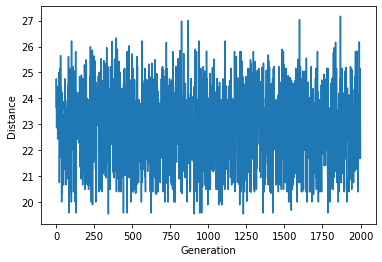

In [24]:
rank_,pop=genetic_algorithm(House_List=HouseList)

In [25]:
x_axis=[]
y_axis=[]
for i in HouseList:
    x_axis.append(i[0])
    y_axis.append(i[1])

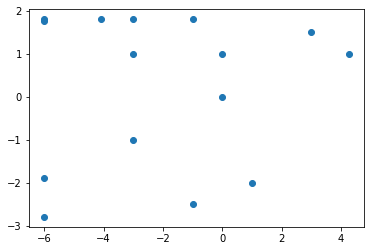

In [26]:
plt.scatter(x_axis,y_axis)
plt.show()
